## PROJECT TITLE : NYC TAXI TRIP DURATION

## Predicting the total ride duration of taxi trips in New York City

* Data analytics
* Linear Regression

# **Project Summary -**The NYC Taxi Time Prediction project aims to predict the amount of time a taxi trip will take in New York City, based on various features such as pickup and dropoff locations, time of day, and weather conditions.

The taxi trip duration dataset consists of large amount of data with over 1.5 million taxi trips.

The data was analysed to find various patterns between features of the dataset and the trip duration.

The features used in the regression model included distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather conditions such as temperature, precipitation, and wind speed.

Correlation was calculated amoung all the columns and best suited columns were taken under consideration.

Finally , linear regression was implemented using RMSE loss and accuracy of the model was calculated.

## **Problem statement**
Analysing, Preprocessing and Understanding the data to find patterns and best suited features for a linear regression model

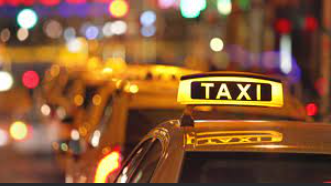

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Sonal Jain/Desktop/img/taxi.png',height=500,width=700)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle

In [3]:
train_df= pd.read_csv('C:/Users/Sonal Jain/Downloads/train.csv')
test_df=pd.read_csv('C:/Users/Sonal Jain/Downloads/test.csv')

## Take a Quick Look at the Data Structure

In [4]:
train_df.head(n=2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## ***2. Understanding Your Variables***

###**Column Details**
Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

## DATA PREPROCESSING

### NULL VALUES

In [7]:
train_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### DATA WRANGLING

In [8]:
# converting into proper date format
train_df["pickup_datetime"]=pd.to_datetime(train_df["pickup_datetime"])
train_df["dropoff_datetime"]=pd.to_datetime(train_df["dropoff_datetime"])

In [9]:
# finding pickup and drop month
train_df["pickup_month"]=train_df["pickup_datetime"].dt.month
train_df["dropoff_month"]=train_df["dropoff_datetime"].dt.month

In [10]:
# finding pickup and drop day
train_df["pickup_date"]=train_df["pickup_datetime"].dt.day
train_df["dropoff_date"]=train_df["dropoff_datetime"].dt.day

In [11]:
# finding pickup and drop weekday
train_df["pickup_weekday"]=train_df["pickup_datetime"].dt.weekday
train_df["dropoff_weekday"]=train_df["dropoff_datetime"].dt.weekday

In [12]:
# Creating pickup and dropoff hours
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour
train_df['dropoff_hour'] =train_df['dropoff_datetime'].dt.hour

In [13]:
#creating pickup and dropoff day name
train_df['pickup_day']=train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.day_name()

In [14]:
train_df.head(n=2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday


In [15]:
# calculate trip duration in minute
train_df["trip_duration_in_minute"]=train_df["trip_duration"]/60

In [16]:
# calculate the distance by given geospatial co ordinate in kilometer
train_df['distance'] = train_df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


## DATA VIZUAlIZATION

In [17]:
train_df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

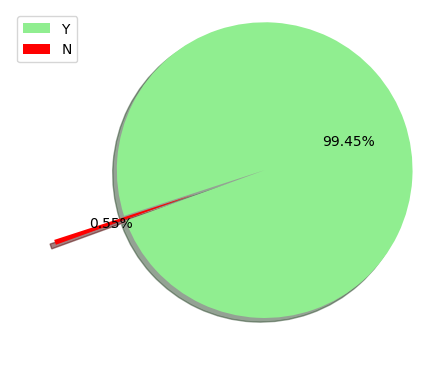

In [18]:
plt.pie(train_df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'red'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])

In [19]:
train_df["pickup_day"].value_counts()

pickup_day
Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

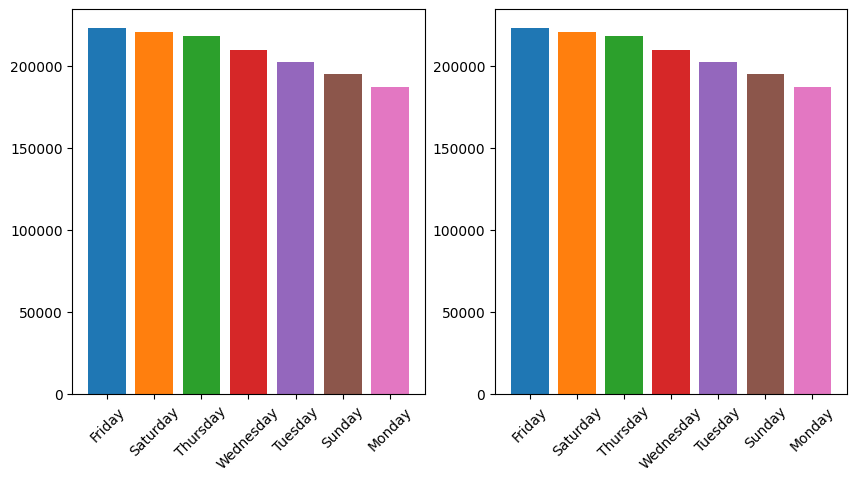

In [20]:
#pickup and dropoff by weekday
pickup_counts=train_df["pickup_day"].value_counts()
dropoff_counts=train_df["dropoff_day"].value_counts()
weekdays = ['Friday', 'Saturday', 'Thursday','Wednesday','Tuesday','Sunday','Monday']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(10, 5))  
# 1st plot
plt.subplot(1, 2, 1)
plt.bar(weekdays,pickup_counts,color=colors)
plt.xlabel="Weekdays"
plt.ylabel="Counts"
plt.title="No of pickups"
plt.xticks(rotation=45)
# 2nd plot
plt.subplot(1, 2, 2)
plt.bar(weekdays,pickup_counts,color=colors)
plt.xlabel="Weekdays"
plt.ylabel="Counts"
plt.title="No of dropoffs"
plt.xticks(rotation=45)

Thus it is apparent from the plots that heighest number of pickups and drops take place on the Fridays and Saturdays (Weekends)

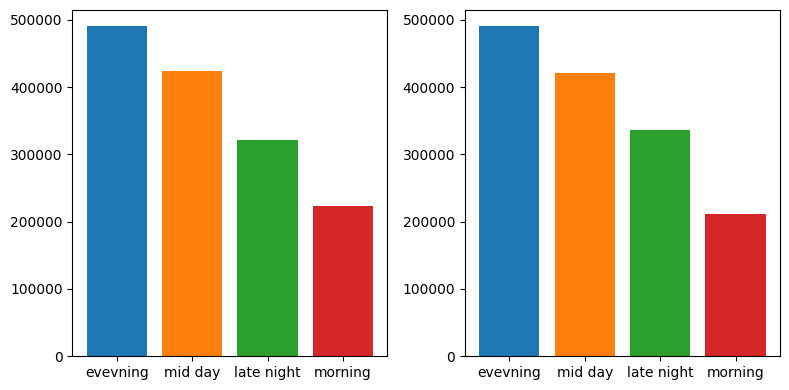

In [21]:
#pickup and dropoff by hour
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"  
  elif x>=16 and x<22:
    return "evevning" 
  elif x>=22 or x<6:
    return "late night"  
train_df["pickup_time_zone"]=train_df.pickup_hour.apply(timezone)
train_df["dropoff_time_zone"]=train_df.dropoff_hour.apply(timezone)

plt.figure(figsize=(8, 4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
pickup_time_zones = train_df["pickup_time_zone"].value_counts()
dropoff_time_zones = train_df["dropoff_time_zone"].value_counts()

# Pickup Time Zones
plt.subplot(1, 2, 1)
plt.bar(pickup_time_zones.index, pickup_time_zones, color=colors)

# Dropoff Time Zones
plt.subplot(1, 2, 2)
plt.bar(dropoff_time_zones.index, dropoff_time_zones, color=colors)

plt.tight_layout()

plt.show()

Thus most pickups take place between 4pm and 10pm in the evening

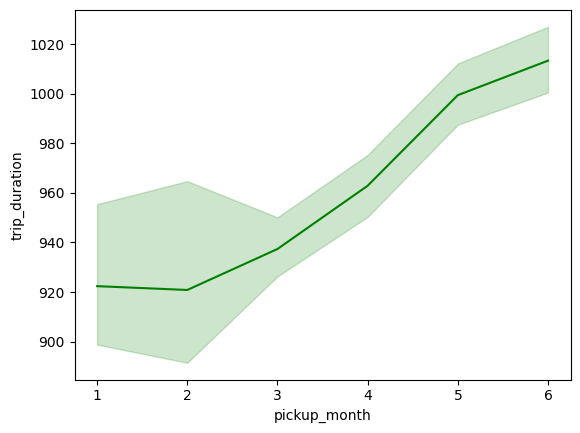

<Figure size 800x400 with 0 Axes>

In [22]:
# pickup by month
sns.lineplot(x='pickup_month',y='trip_duration',data=train_df,color='green')
plt.figure(figsize=(8,4))
plt.show()

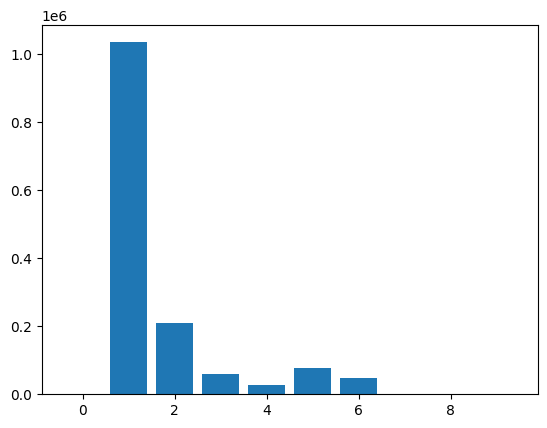

In [23]:
passenger_count=train_df['passenger_count'].value_counts()
x=passenger_count.index
y=passenger_count.values
plt.bar(x,y)
plt.show()

1 frequency has the heighest number of counts, thus it can be interpreted that the passengers like to travel solo 

C:\Users\Sonal Jain\AppData\Local\Temp\ipykernel_2080\326832266.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar',color=colors)


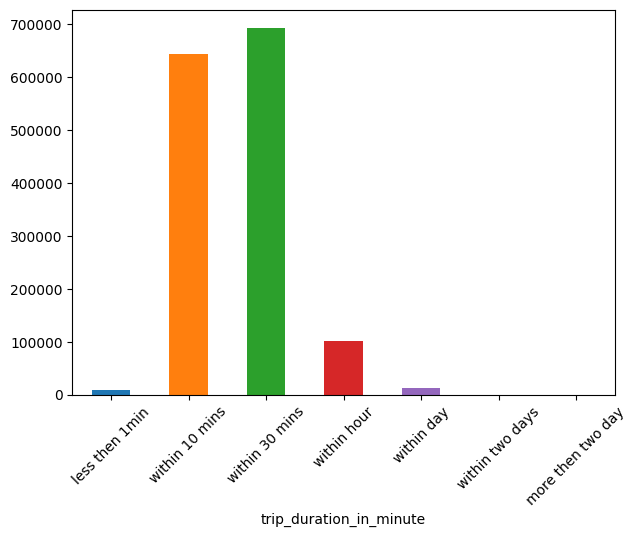

In [24]:
# distance and duration graph
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=[7,5])
df1=pd.cut(train_df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
train_df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar',color=colors)
plt.xticks(rotation=45)
plt.show()

## DATA CLEANING AND HANDLING TEXTUAL DATA

In [25]:
columns_to_drop=['id','pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_time_zone','dropoff_time_zone']
train_df.drop(columns_to_drop,axis=1,inplace=True)
train_df.head(n=1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,trip_duration_in_minute,distance
0,2,1,-73.982155,40.767937,-73.96463,40.765602,N,455,3,3,14,14,0,0,17,17,7.583333,1.498523


### One hot encoding

In [26]:
train_df= pd.get_dummies(train_df,columns=['store_and_fwd_flag'])
train_df.head(n=1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,trip_duration_in_minute,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.982155,40.767937,-73.96463,40.765602,455,3,3,14,14,0,0,17,17,7.583333,1.498523,True,False


## CORRELATION
### Heatmap

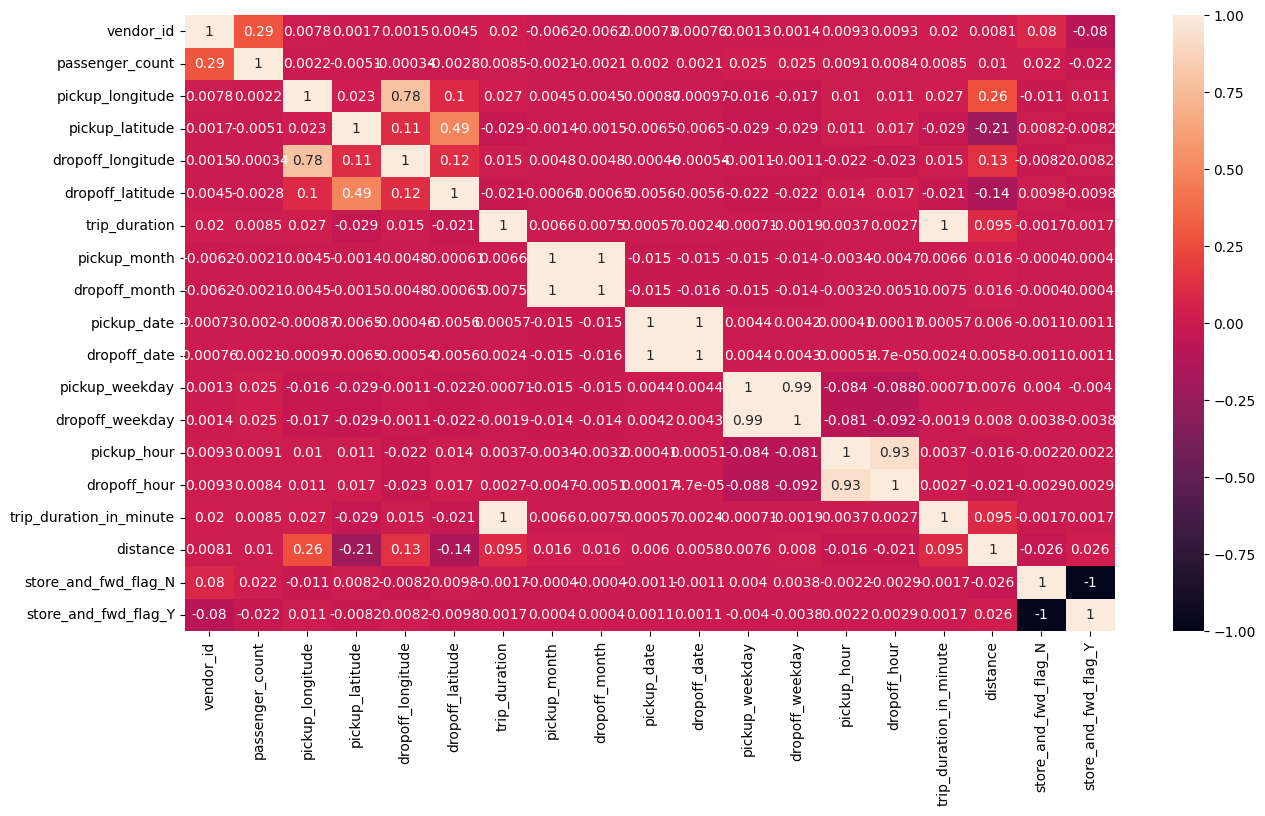

In [27]:
plt.figure(figsize=(15,8))
correlation=train_df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

* Thus pickup month and dropoff month are 100% correlated.Pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are also highly correlated.

In [28]:
correlation=train_df.corr()

In [29]:
def correlated (dataset,thresold):
  corr_column=[]    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.append(column_name)            # add he name column in empty set
  return corr_column        

In [30]:
columns_to_drop=correlated(train_df,0.9)
columns_to_drop

['dropoff_month',
 'dropoff_date',
 'dropoff_weekday',
 'dropoff_hour',
 'trip_duration_in_minute',
 'store_and_fwd_flag_Y']

* by above  evaluation we can say that there are four column  they are highly correlated above 90%.
* it better to drop higly correlated features for better performance.

In [31]:
train_df.drop(columns_to_drop,axis=1,inplace=True)
train_df.head(n=1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_date,pickup_weekday,pickup_hour,distance,store_and_fwd_flag_N
0,2,1,-73.982155,40.767937,-73.96463,40.765602,455,3,14,0,17,1.498523,True


In [32]:
## repeating above steps for test dataset

In [33]:
test_df["pickup_datetime"] = pd.to_datetime(test_df["pickup_datetime"])
test_df["pickup_month"] = test_df["pickup_datetime"].dt.month
test_df["pickup_weekday"] = test_df["pickup_datetime"].dt.weekday
test_df["pickup_date"] = test_df["pickup_datetime"].dt.day
test_df['distance'] = test_df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)
# Drop the 'id' column if present
if 'id' in test_df.columns:
    test_df.drop('id', axis=1, inplace=True)
# Apply one-hot encoding for categorical columns like 'store_and_fwd_flag'
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag'])

In [34]:
train_df.head(n=1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_date,pickup_weekday,pickup_hour,distance,store_and_fwd_flag_N
0,2,1,-73.982155,40.767937,-73.96463,40.765602,455,3,14,0,17,1.498523,True


## MACHINE LEARNING MODEL:

#### LINEAR REGRESSION

In [35]:
#1. Separating the target variable
Y_train=train_df['trip_duration']
train_df.drop('trip_duration',axis=1,inplace=True)
X_train=train_df

In [36]:
X_train=X_train.values
Y_train=Y_train.values

In [37]:
Y_train=Y_train.reshape(-1,1)
#X_train=X_train.reshape(-1,1)

In [38]:
#2. scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

In [39]:
def hypothesis(X,theta):
    y_ = theta[0]+theta[1]*X     #y_ = c + m*X
    return y_

In [45]:
def cost(X,Y,theta):
    m=X.shape[0]
    total_loss=0
    for i in range(m):
        y_pred= hypothesis(X[i],theta)    # y_ = theta[0]+theta[1]*X
        y_gt=(Y[i])                        # actual value
        total_loss= (y_pred-y_gt)**2
    
    return total_loss/m

In [41]:
def gradient(X,Y,theta):
    m= X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_pred= hypothesis(X[i],theta)
        y_gt=(Y[i]) 
        
        grad[0]+=(y_pred-y_gt)*1
        grad[1]+=(y_pred-y_gt)*X[i]
    return grad/m

In [42]:
def gradient_descent(X,Y,learning_rate=0.0038):
    
    theta=np.zeros((2,))     
    cost_epoch=[]
    epochs=6000
    for i in range(epochs):
        loss=cost(X,Y,theta)  
        grad=gradient(X,Y,theta)   
        cost_epoch.append(loss)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta,cost_epoch

In [44]:
#theta,cost_epoch = gradient_descent(X_train,Y_train,learning_rate=0.001)

In [ ]:
predictions = np.dot(X_test, theta)
mse = np.mean((predictions - Y_test) ** 2)  # Mean Squared Error
print("Mean Squared Error:", mse)


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
